In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensRegisters = pd.read_sql('SELECT * FROM PensRegisters', con=db_connection)
pensRegisters['created'] = pd.to_datetime(pensRegisters['created'], unit='s')
pensRegisters['registers'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensRegisters['registers'].replace('None', np.NaN, regex=True, inplace=True)
pensRegisters.set_index('id', inplace=True)

In [3]:
pensRegisters.sort_index()

,pen_id,visit_id,registers,created
id,,,,
0,1523211,1652511,"{""company"":""0x0"",""low_battery_level_reached_si...",2015-03-07 03:44:22
793417,8,793401,"{""vibra_on"":1,""tag_counter_after_low_battery_l...",2014-10-23 15:45:29
796509,6,796261,"{""vibra_on"":1,""tag_counter_after_low_battery_l...",2014-11-03 21:35:45
797847,9,797837,"{""vibra_on"":1,""tag_counter_after_low_battery_l...",2014-11-04 20:33:11
798025,7,797915,"{""vibra_on"":1,""tag_counter_after_low_battery_l...",2014-11-04 23:37:59
...,...,...,...,...
132777689,1524473,132777683,NaN,2020-07-02 20:22:39
132794707,1524473,132794701,NaN,2020-07-06 17:42:37
132806725,1524473,132806719,NaN,2020-07-09 13:12:38


In [4]:
pensRegisters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891118 entries, 0 to 132806741
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   pen_id     891118 non-null  int64         
 1   visit_id   891118 non-null  int64         
 2   registers  891060 non-null  object        
 3   created    891118 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 34.0+ MB


In [5]:
pensRegisters.count()
#891,118 registrations 

pen_id       891118
visit_id     891118
registers    891060
created      891118
dtype: int64

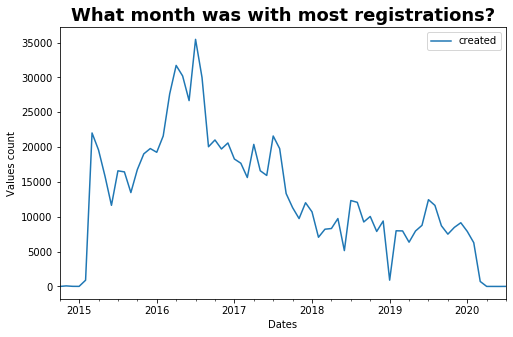

In [7]:
register_by_month = pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("M")).agg('count')

plt.figure(figsize=(8,5))
plt.title('What month was with most registrations?', fontdict={'fontweight': 'bold', 'fontsize':18})
register_by_month.plot()
plt.xlabel('Dates')
plt.ylabel('Values count')
plt.legend()
# plt.savefig('monthly_registers.png', dpi=300)
#the most registrations occurred in 2016

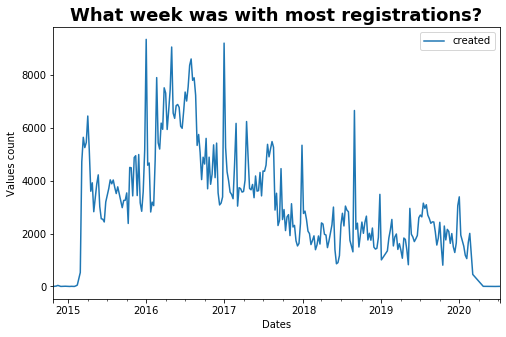

In [8]:
register_by_week = pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("W")).agg('count')

plt.figure(figsize=(8,5))
plt.title('What week was with most registrations?', fontdict={'fontweight': 'bold', 'fontsize':18})
register_by_week.plot()
plt.xlabel('Dates')
plt.ylabel('Values count')
plt.legend()
# plt.savefig('weekly_registers.png', dpi=300)


In [9]:
pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("M")).agg('count').nlargest(12)

created
2016-07    35452
2016-04    31712
2016-05    30202
2016-08    29969
2016-03    27622
2016-06    26663
2015-03    22021
2016-02    21589
2017-07    21586
2016-10    21016
2016-12    20587
2017-04    20382
Freq: M, Name: created, dtype: int64

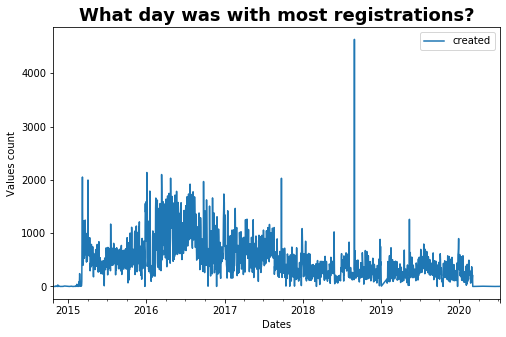

In [10]:
register_by_day = pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("D")).agg('count')

plt.figure(figsize=(8,5))
plt.title('What day was with most registrations?', fontdict={'fontweight': 'bold', 'fontsize':18})
register_by_day.plot()
plt.xlabel('Dates')
plt.ylabel('Values count')
plt.legend()
# plt.savefig('daily_registers.png', dpi=300)

In [11]:
pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("D")).agg('count').nlargest(10)
#unique day in 2018 - but most of the days where in 2016
#what happened in 2018-08-30- August 2018 -  "we got contractors to help to fix Pens and registration stations in 2018" 

created
2018-08-30    4635
2016-01-03    2138
2016-03-12    2100
2015-03-08    2053
2016-04-23    2032
2017-09-23    2030
2015-04-03    1997
2016-09-24    1969
2016-07-23    1920
2016-01-17    1790
Freq: D, Name: created, dtype: int64

### Cleaning the fixing day at August 30 2018

In [15]:
pensRegisters['created'] = pensRegisters['created'].dt.to_period('D')

AttributeError: 'PeriodProperties' object has no attribute 'to_period'

In [28]:
mask2018 = pensRegisters['created'] != '2018-08-30'
df = pensRegisters[mask2018]
df['created'].groupby(df.created).agg('count').nlargest(10)

created
2016-01-03    2138
2016-03-12    2100
2015-03-08    2053
2016-04-23    2032
2017-09-23    2030
2015-04-03    1997
2016-09-24    1969
2016-07-23    1920
2016-01-17    1790
2016-05-21    1785
Freq: D, Name: created, dtype: int64

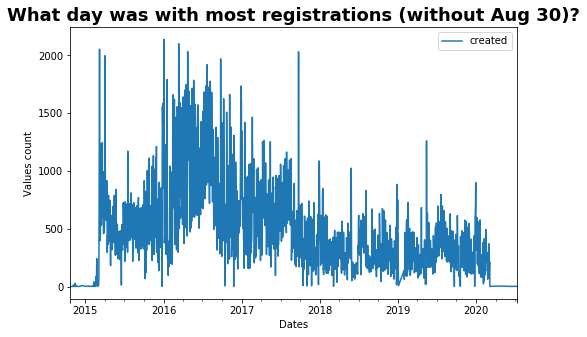

In [32]:
register_by_clean_day = df['created'].groupby(df.created).agg('count')

plt.figure(figsize=(8,5))
plt.title('What day was with most registrations (without Aug 30)?', fontdict={'fontweight': 'bold', 'fontsize':18})
register_by_clean_day.plot()
plt.xlabel('Dates')
plt.ylabel('Values count')
plt.legend()
# plt.savefig('daily_registers.png', dpi=300)

In [12]:
pensRegisters['created'].groupby(pensRegisters.created.dt.weekday).agg('count').sort_values(ascending=False)
#Thursday and Friday were the most popular days

created
5    198480
6    180864
4    116344
0    106429
3    100037
1     99386
2     89578
Name: created, dtype: int64

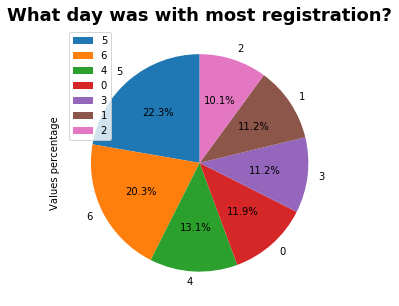

In [13]:
popular_days = pensRegisters['created'].groupby(pensRegisters.created.dt.weekday).agg('count').sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.title('What day was with most registration?', fontdict={'fontweight': 'bold', 'fontsize':18})
popular_days.plot.pie(y='created', figsize=(8, 5),autopct='%1.1f%%', startangle=90)
                      
plt.ylabel('Values percentage')
plt.legend()
# plt.savefig('daily_registeration.png', dpi=300)

In [14]:
#Zooming into 2016
start_date = '01-01-2016'
end_date = '31-12-2016'
mask = (pensRegisters['created'] > start_date) & (pensRegisters['created'] <= end_date)
sixthteen = pensRegisters.loc[mask]
sixthteen

,pen_id,visit_id,registers,created
id,,,,
91914589,1523917,91336643,"{""vibra_on"":1,""low_battery_level_reached_since...",2016-01-01 03:00:07
91914603,1524691,91900813,"{""vibra_on"":1,""low_battery_level_reached_since...",2016-01-01 03:00:08
91914659,1525465,91826455,"{""vibra_on"":1,""low_battery_level_reached_since...",2016-01-01 03:00:09
91914681,1523031,91728611,"{""vibra_on"":1,""low_battery_level_reached_since...",2016-01-01 03:00:11
91914683,1525213,91708083,"{""vibra_on"":1,""low_battery_level_reached_since...",2016-01-01 03:00:11
...,...,...,...,...
111425577,1525133,111404055,"{""vibra_on"":1,""low_battery_level_reached_since...",2016-12-30 22:54:01
111425659,1522349,111405957,"{""vibra_on"":1,""low_battery_level_reached_since...",2016-12-30 22:54:10
111425699,1521621,111407185,"{""vibra_on"":1,""low_battery_level_reached_since...",2016-12-30 22:54:24


In [15]:
sixthteen['created'].groupby(sixthteen.created.dt.to_period("M")).agg('count').nlargest(12)
#the busiest months in 2016

created
2016-07    35452
2016-04    31712
2016-05    30202
2016-08    29969
2016-03    27622
2016-06    26663
2016-02    21589
2016-10    21016
2016-09    20046
2016-12    19811
2016-11    19724
2016-01    19249
Freq: M, Name: created, dtype: int64

In [16]:
sixthteen['created'].groupby(sixthteen.created.dt.weekday).agg('count').sort_values(ascending=False)
#the busiest days in 2016

created
5    71366
6    63189
4    39724
0    34634
3    32358
1    32166
2    29618
Name: created, dtype: int64

## how many ppl registered the pen?


In [20]:
pensRegisters['visit_id'].value_counts().count()

526231

In [18]:
pensRegisters[~pensRegisters['visit_id'].duplicated()]

,pen_id,visit_id,registers,created
id,,,,
0,1523211,1652511,"{""company"":""0x0"",""low_battery_level_reached_si...",2015-03-07 03:44:22
793417,8,793401,"{""vibra_on"":1,""tag_counter_after_low_battery_l...",2014-10-23 15:45:29
796509,6,796261,"{""vibra_on"":1,""tag_counter_after_low_battery_l...",2014-11-03 21:35:45
797847,9,797837,"{""vibra_on"":1,""tag_counter_after_low_battery_l...",2014-11-04 20:33:11
798025,7,797915,"{""vibra_on"":1,""tag_counter_after_low_battery_l...",2014-11-04 23:37:59
...,...,...,...,...
132777689,1524473,132777683,NaN,2020-07-02 20:22:39
132794707,1524473,132794701,NaN,2020-07-06 17:42:37
132806725,1524473,132806719,NaN,2020-07-09 13:12:38


In [21]:
pensRegisters['pen_id'].value_counts()

1523211    2528
1525511    1279
1523121    1189
1521555    1094
1519959    1092
           ... 
1521673       1
1525029       1
1509679       1
1524519       1
1520715       1
Name: pen_id, Length: 3007, dtype: int64

## summerize findings

In [4]:
findings = [{'total_registrations': '891,118', 'how_many_visitors_registered':'526231', 'top_pen': '1523211','most_registeres_in_month': '2016-07 with 35,452',
            'most_register_in_day': '2016-01-03 with 2,138'},
            {'top_pen': '1525511', 'most_registeres_in_month': '2016-04 with 31,712', 'most_register_in_day': '2016-03-12 with 2,100'},
           {'top_pen': '1523121', 'most_registeres_in_month': '2016-05 with 30,202', 'most_register_in_day': '2015-03-08 with 2,053'}] 


registration_finding = pd.DataFrame(findings)

In [5]:
registration_finding.transpose()

,0,1,2
total_registrations,"891,118",NaN,NaN
how_many_visitors_registered,526231,NaN,NaN
top_pen,1523211,1525511,1523121
most_registeres_in_month,"2016-07 with 35,452","2016-04 with 31,712","2016-05 with 30,202"
most_register_in_day,"2016-01-03 with 2,138","2016-03-12 with 2,100","2015-03-08 with 2,053"
